In [1]:
import numpy as np
import pickle
import scipy.io as spio
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cmx
import matplotlib.colors as colors
import itertools
import reservoirpy
from sklearn.metrics.cluster import contingency_matrix
from sklearn.cluster import KMeans
from reservoirpy.mat_gen import generate_internal_weights, generate_input_weights
from reservoirpy.nodes import Reservoir, Ridge, Input, Output
from reservoirpy.datasets import mackey_glass
from reservoirpy.nodes import ESN

In [2]:
pip install --upgrade --pre reservoirpy --user

Note: you may need to restart the kernel to use updated packages.


In [3]:
# parameters for the analysis
data_path = "./data/SRL_data/hierarchical-task-reservoir-srl_cleaned/dataset_srl/"
clean_data = "./data/SRL_data/processed/"
save = True

In [4]:
input_data = spio.loadmat(data_path+"inputs.mat", squeeze_me=True)
inputs = [inp.T for inp in input_data['inputs']]

In [5]:
if save:
    with open(clean_data + "inputs.pkl", 'wb') as fp:
        pickle.dump(inputs, fp)

In [6]:
# Phoneme targets
ph_data = spio.loadmat(data_path+"targets_ph.mat", squeeze_me=True)
ph_target_labels = [inp for inp in ph_data['targets_PH']]

# one-hot encoding
Target_indexes = np.array(list(map(int, set(np.concatenate(ph_target_labels)))))-1
I = np.eye(Target_indexes.shape[0])
targets_2 = []
for target in ph_target_labels:
    targets_2.append(np.transpose(I[np.array(list(map(int, target)))-1]))
ph_targets = targets_2

In [7]:
if save:
    pickle.dump(ph_targets, open('./data/SRL_data/processed/ph_targets.pkl', 'wb'))

## Data setup


In [8]:
# Load and preprocess dataset
data_path = "./data/SRL_data/processed/"
data_labels = ["inputs", "ph_targets"]
dataset = {}
for dl in data_labels:
    data = pickle.load(open(data_path+dl+'.pkl', 'rb'))
    dataset.update({dl: data})

In [9]:
start = 0
cutoff = 0.2
data_size = len(dataset['inputs']) 

data_cutoff = int(np.around(data_size * cutoff))

train = int(0.7 * data_cutoff)
val_split = int(0.7 * train)

train_data = dataset['inputs'][start:][:train]   
train_target1 = dataset["ph_targets"][start:][:train]        
train_list = [train_target1] 
test_data = dataset['inputs'][start:][train:data_cutoff]
test_target1 = dataset["ph_targets"][start:][train:data_cutoff]    
test_list = [test_target1]

## ESN

In [10]:
res = Reservoir(1000, sr=0.9, lr=0.2)
readout = Ridge(ridge=1e-5)
esn = res >> readout 

In [11]:
dataset0 = ((train_data, train_list[0]), (test_data, test_list[0]))
k, j = dataset0
X_train, y_train = k
X_test, y_test = j

In [12]:
%%time
target_ts = [t.T for t in y_train]
esn.fit(X_train, target_ts)

Running Model-0:   0%|                                                                         | 0/882 [00:00<?, ?it/s]
Running Model-0: 290it [00:00, 3545.00it/s]                                                                            
Running Model-0:   0%|                                                                 | 1/882 [00:00<01:29,  9.81it/s]
Running Model-0: 214it [00:00, 3576.22it/s]                                                                            

Running Model-0: 307it [00:00, 3579.32it/s]                                                                            
Running Model-0:   0%|▏                                                                | 3/882 [00:00<01:17, 11.30it/s]
Running Model-0: 282it [00:00, 3579.67it/s]                                                                            

Running Model-0: 360it [00:00, 3645.17it/s]                                                                            
Running Model-0:   1%|▎               

Running Model-0: 267it [00:00, 3569.54it/s]                                                                            
Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 512it [00:00, 3468.76it/s]                                                                            

Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 378it [00:00, 3574.77it/s]                                                                            
Running Model-0:   9%|█████▊                                                          | 80/882 [00:07<01:28,  9.05it/s]
Running Model-0: 359it [00:00, 3635.02it/s]                                                                            
Running Model-0:   9%|█████▉                                                          | 81/882 [00:08<01:29,  9.00it/s]
Running Model-0: 262it [00:00, 3634.74i

Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 512it [00:00, 3491.76it/s]                                                                            
Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 395it [00:00, 3462.43it/s]                                                                            

Running Model-0: 240it [00:00, 3389.43it/s]                                                                            
Running Model-0:  18%|███████████▏                                                   | 157/882 [00:15<01:11, 10.15it/s]
Running Model-0: 257it [00:00, 3435.84it/s]                                                                            

Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 379it [00:00, 3486.36

Running Model-0: 345it [00:00, 3603.38it/s]                                                                            
Running Model-0:  26%|████████████████▍                                              | 230/882 [00:22<01:05, 10.01it/s]
Running Model-0: 340it [00:00, 3705.53it/s]                                                                            

Running Model-0: 292it [00:00, 3614.58it/s]                                                                            
Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 461it [00:00, 3494.78it/s]                                                                            

Running Model-0: 205it [00:00, 3604.67it/s]                                                                            
Running Model-0:  27%|████████████████▋                                              | 234/882 [00:22<01:05,  9.89it/s]
Running Model-0: 230it [00:00, 3601.81

Running Model-0: 345it [00:00, 3640.14it/s]                                                                            
Running Model-0:  34%|█████████████████████▍                                         | 300/882 [00:29<01:07,  8.58it/s]
Running Model-0: 312it [00:00, 3637.60it/s]                                                                            

Running Model-0: 257it [00:00, 3578.63it/s]                                                                            
Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 393it [00:00, 3456.67it/s]                                                                            
Running Model-0:  34%|█████████████████████▋                                         | 303/882 [00:29<01:03,  9.10it/s]
Running Model-0: 288it [00:00, 3608.34it/s]                                                                            

Running Model-0: 248it [00:00, 3553.07

Running Model-0:  42%|██████████████████████████▌                                    | 371/882 [00:36<00:49, 10.38it/s]
Running Model-0: 299it [00:00, 3223.63it/s]                                                                            

Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 475it [00:00, 3132.89it/s]                                                                            
Running Model-0:  42%|██████████████████████████▋                                    | 373/882 [00:36<00:55,  9.25it/s]
Running Model-0: 273it [00:00, 3337.25it/s]                                                                            

Running Model-0: 229it [00:00, 3102.85it/s]                                                                            
Running Model-0:  43%|██████████████████████████▊                                    | 375/882 [00:37<00:51,  9.75it/s]
Running Model-0: 273it [00:00, 3219.66

Running Model-0:  50%|███████████████████████████████▋                               | 444/882 [00:44<00:51,  8.46it/s]
Running Model-0: 185it [00:00, 3501.17it/s]                                                                            

Running Model-0: 292it [00:00, 3216.55it/s]                                                                            
Running Model-0:  51%|███████████████████████████████▊                               | 446/882 [00:44<00:46,  9.45it/s]
Running Model-0: 319it [00:00, 3504.11it/s]                                                                            
Running Model-0:  51%|███████████████████████████████▉                               | 447/882 [00:44<00:45,  9.52it/s]
Running Model-0: 255it [00:00, 3550.11it/s]                                                                            

Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 381it [00:00, 3536.47

Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 396it [00:00, 3609.62it/s]                                                                            

Running Model-0: 277it [00:00, 3654.51it/s]                                                                            
Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 450it [00:00, 3580.27it/s]                                                                            

Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 378it [00:00, 3574.81it/s]                                                                            
Running Model-0:  59%|█████████████████████████████████████▍                         | 524/882 [00:52<00:37,  9.46it/s]
Running Model-0: 349it [00:00, 3683.51


Running Model-0: 246it [00:00, 3203.37it/s]                                                                            
Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 378it [00:00, 3444.83it/s]                                                                            

Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 404it [00:00, 3404.06it/s]                                                                            
Running Model-0:  68%|██████████████████████████████████████████▋                    | 598/882 [00:59<00:29,  9.51it/s]
Running Model-0: 279it [00:00, 3496.87it/s]                                                                            

Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 362it [00:00, 3456.0

Running Model-0: 356it [00:00, 3398.81it/s]                                                                            
Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 447it [00:00, 3501.52it/s]                                                                            
Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 321it [00:00, 2775.17it/s]                                                                            
Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 370it [00:00, 2727.87it/s]                                                                            
Running Model-0:  76%|███████████████████████████████████████████████▉               | 671/882 [01:06<00:29,  7.24it/s]
Running Model-0: 287it [00:00, 3425.79it

Running Model-0: 276it [00:00, 3057.20it/s]                                                                            
Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 453it [00:00, 3291.45it/s]                                                                            
Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 457it [00:00, 3368.98it/s]                                                                            
Running Model-0:  83%|████████████████████████████████████████████████████▌          | 735/882 [01:14<00:22,  6.65it/s]
Running Model-0: 243it [00:00, 3480.73it/s]                                                                            

Running Model-0: 281it [00:00, 3564.21it/s]                                                                            
Running Model-0:  84%|█████████████████

Running Model-0: 371it [00:00, 3575.97it/s]                                                                            
Running Model-0:  91%|█████████████████████████████████████████████████████████      | 799/882 [01:20<00:07, 10.81it/s]
Running Model-0: 244it [00:00, 3705.59it/s]                                                                            

Running Model-0: 301it [00:00, 3680.59it/s]                                                                            
Running Model-0:  91%|█████████████████████████████████████████████████████████▏     | 801/882 [01:21<00:07, 11.09it/s]
Running Model-0: 232it [00:00, 3635.50it/s]                                                                            

Running Model-0: 294it [00:00, 3508.36it/s]                                                                            
Running Model-0:   0%|                                                                           | 0/1 [00:00<?, ?it/s]
Running Model-0: 443it [00:00, 3524.57

Running Model-0: 322it [00:00, 3667.90it/s]                                                                            
Running Model-0: 100%|██████████████████████████████████████████████████████████████▉| 881/882 [01:28<00:00, 11.41it/s]
Running Model-0: 300it [00:00, 3666.86it/s]                                                                            
Running Model-0: 100%|███████████████████████████████████████████████████████████████| 882/882 [01:28<00:00,  9.99it/s]


Fitting node Ridge-0...
CPU times: total: 1min 36s
Wall time: 1min 28s


'Model-0': Model('Reservoir-0', 'Ridge-0')

In [13]:
%%time
preds = esn.run(X_test)

Running Model-0: 469it [00:00, 1971.10it/s]                                                                            
Running Model-0: 243it [00:00, 2528.09it/s]                                                                            
Running Model-0: 452it [00:00, 2433.65it/s]                                                                            
Running Model-0: 280it [00:00, 2613.24it/s]                                                                            
Running Model-0: 318it [00:00, 2638.29it/s]                                                                            
Running Model-0: 281it [00:00, 2732.34it/s]                                                                            
Running Model-0: 242it [00:00, 2659.31it/s]                                                                            
Running Model-0: 297it [00:00, 2563.53it/s]                                                                            
Running Model-0: 401it [00:00, 2571.82it

Running Model-0: 327it [00:00, 2581.69it/s]                                                                            
Running Model-0: 388it [00:00, 2759.13it/s]                                                                            
Running Model-0: 329it [00:00, 2618.07it/s]                                                                            
Running Model-0: 270it [00:00, 2299.49it/s]                                                                            
Running Model-0: 389it [00:00, 2698.57it/s]                                                                            
Running Model-0: 288it [00:00, 2443.65it/s]                                                                            
Running Model-0: 287it [00:00, 2478.34it/s]                                                                            
Running Model-0: 230it [00:00, 2464.67it/s]                                                                            
Running Model-0: 299it [00:00, 2457.37it

Running Model-0: 471it [00:00, 2602.67it/s]                                                                            
Running Model-0: 251it [00:00, 2859.88it/s]                                                                            
Running Model-0: 259it [00:00, 2822.24it/s]                                                                            
Running Model-0: 266it [00:00, 2617.85it/s]                                                                            
Running Model-0: 157it [00:00, 2691.41it/s]                                                                            
Running Model-0: 189it [00:00, 2694.92it/s]                                                                            
Running Model-0: 359it [00:00, 2630.91it/s]                                                                            
Running Model-0: 330it [00:00, 2787.43it/s]                                                                            
Running Model-0: 493it [00:00, 2698.26it

CPU times: total: 40 s
Wall time: 44.7 s


In [14]:
preds1 = esn.run(X_test[0])
labels_target1 = np.argmax(y_test[0], axis=0)

Running Model-0: 469it [00:00, 2576.03it/s]                                                                            


In [15]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(preds1)

In [16]:
def get_cmap(N, cmap='hsv'):
    """
    Returns a function that maps each index in 0, 1, ... N-1 to a distinct
    RGB color.
    """
    color_norm = colors.Normalize(vmin=0, vmax = N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap=cmap)

    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)

    return map_index_to_rgb_color

In [17]:
unique_labels = np.unique(labels_target1)
colors_map = get_cmap(N=len(unique_labels), cmap='jet')
ccs = [np.array(colors_map(i)) for i in range(len(unique_labels))]
lab_seq = np.array(list(itertools.chain(labels_target1)))

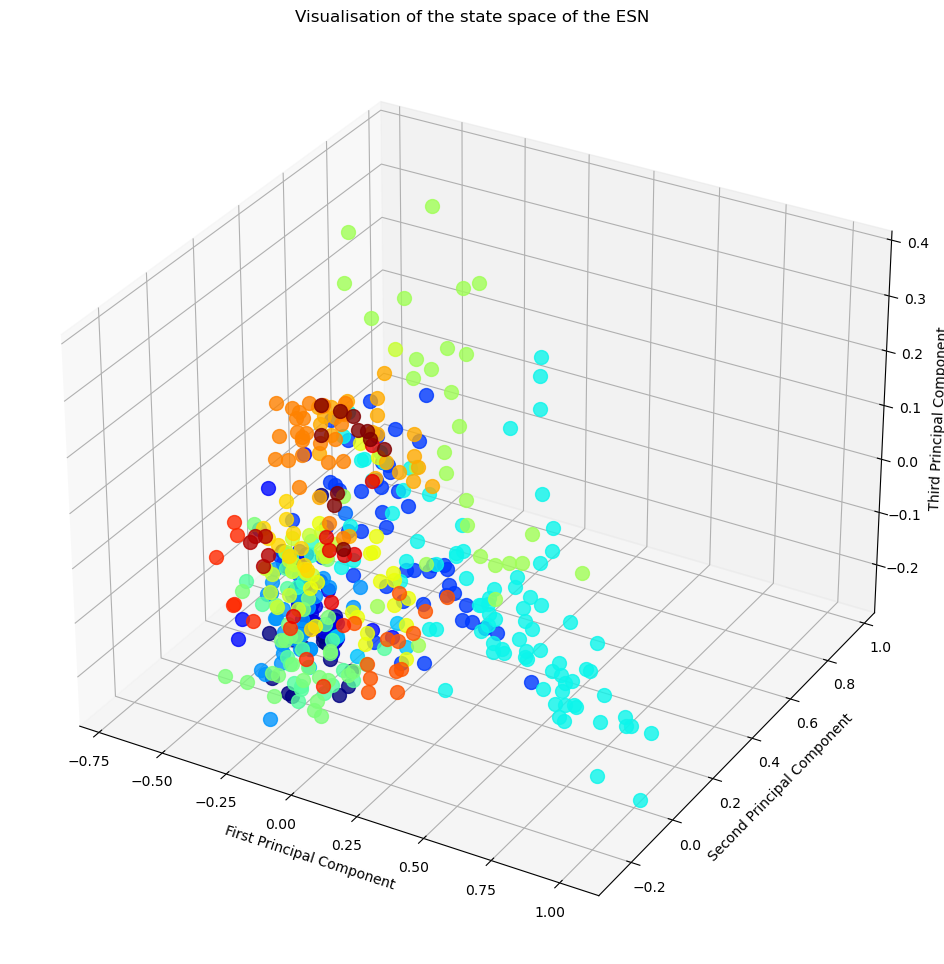

In [18]:
fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(111, projection='3d', title="Visualisation of the state space of the ESN", xlabel= 'First Principal Component', ylabel= 'Second Principal Component', zlabel= 'Third Principal Component')
scatters = []
for color, index in zip(ccs, unique_labels):
    tmp = ax.plot(principalComponents[np.where(lab_seq == index)[0], 0], principalComponents[np.where(lab_seq == index)[0], 1],
                             principalComponents[np.where(lab_seq == index)[0], 2], marker='o', linestyle='', ms=10, c=color,
                          alpha=0.8,
                          label=index)
    scatters.append(tmp[0])

In [19]:
kmeans = KMeans(n_clusters=23, random_state=0, n_init="auto")
labels = kmeans.fit_predict(principalComponents)

In [20]:
unique_labels = np.unique(labels)
colors_map = get_cmap(N=len(unique_labels), cmap='jet')
ccs = [np.array(colors_map(i)) for i in range(len(unique_labels))]

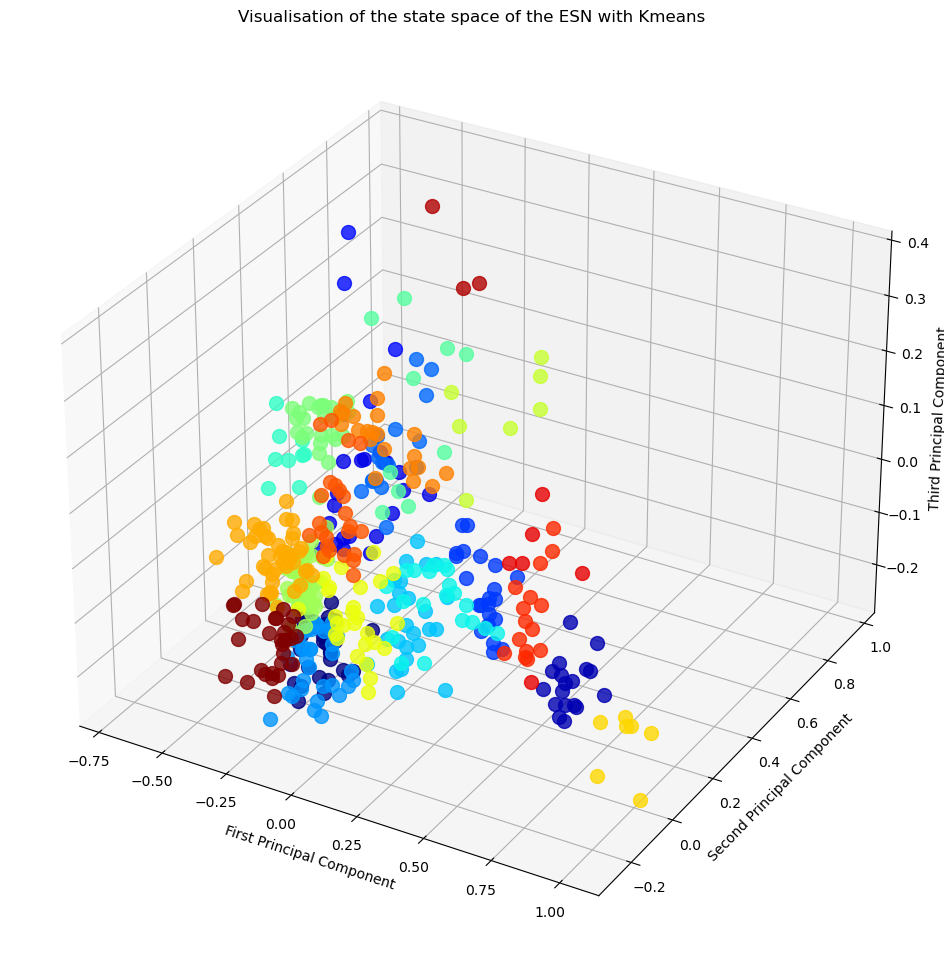

In [21]:
fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(111, projection='3d', title="Visualisation of the state space of the ESN with Kmeans", xlabel= 'First Principal Component', ylabel= 'Second Principal Component', zlabel= 'Third Principal Component')
scatters = []
for color, index in zip(ccs, unique_labels):
    tmp = ax.plot(principalComponents[np.where(labels == index)[0], 0], principalComponents[np.where(labels == index)[0], 1],
                             principalComponents[np.where(labels == index)[0], 2], marker='o', linestyle='', ms=10, c=color,
                          alpha=0.8,
                          label=index)
    scatters.append(tmp[0])

In [22]:
mat  = contingency_matrix(lab_seq, labels)
summings = []
columnssummed = mat.sum(axis=0)
for i in mat:
    summie = 0
    for j in i:
        summie += j
    summings.append(summie)
totaldiff = 0
for i in range(23):
    totaldiff += abs(summings[i]-columnssummed[i])
print((1 - totaldiff/469) * 100)

[[ 9  0  0  0  0  0  6  0  0  0  0  0  1  0  0  0  5  0  1  0  0  0  2]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0 12  0  4  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  2  0  0  1  0  0  0  1  0  0  0  0  0  2]
 [ 0  0  0  1  0 10  0  0 19  0  4  0  2  0  1  0  3  0  8  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  1  0  0  0  0]
 [ 4  0  0  0  0  0  5  0  0  0  0  0  6  0  4  0  4  0  0  0  0  0 10]
 [ 0  0  0  0  0  0  2  1  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0 18  7  0 18  1  0  7  0  0  0  2  0  4  1  7  0  1  2 15  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  6  0  0  0  0  0  2  0  2  0  1  0  0  0  0  0  1]
 [ 9  0  0  0  0  0  4  0  0  0  0  0  3  0  0  0  2  0  0  0  0  0 10]
 [ 0  0  0  2  4  3  0  3  0  0  6  0  0  3  0  0  0  1  1  0  4  3  0]
 [ 0  0  2  1  0  0  0  0  0  0  0  0  5  0  2  0  9  0  4  0  0

In [23]:
def FER(y_pred, y_test):
    total = 0
    num_incorrect = 0
    for pr, ts in list(zip(y_pred, y_test)):
        num_incorrect += np.sum(np.argmax(pr, axis=0) != np.argmax(ts, axis=0))
        total += pr.shape[1]
  
    return num_incorrect/total

In [24]:
test_error = FER([t.T for t in preds], y_test)
print("The test error is:", test_error)

The test error is: 0.5903071563155462


In [25]:
def getreadytoplot(y_hat, y_test):
    valueshat = []
    truevalues = []
    for pr, ts in list(zip(y_hat, y_test)):
        valueshat.append(np.sum(np.argmax(pr, axis=0)))
        truevalues.append(np.sum(np.argmax(ts, axis=0)))
    return valueshat, truevalues

In [26]:
valueshat, truevalues = getreadytoplot([t.T for t in preds], y_test)

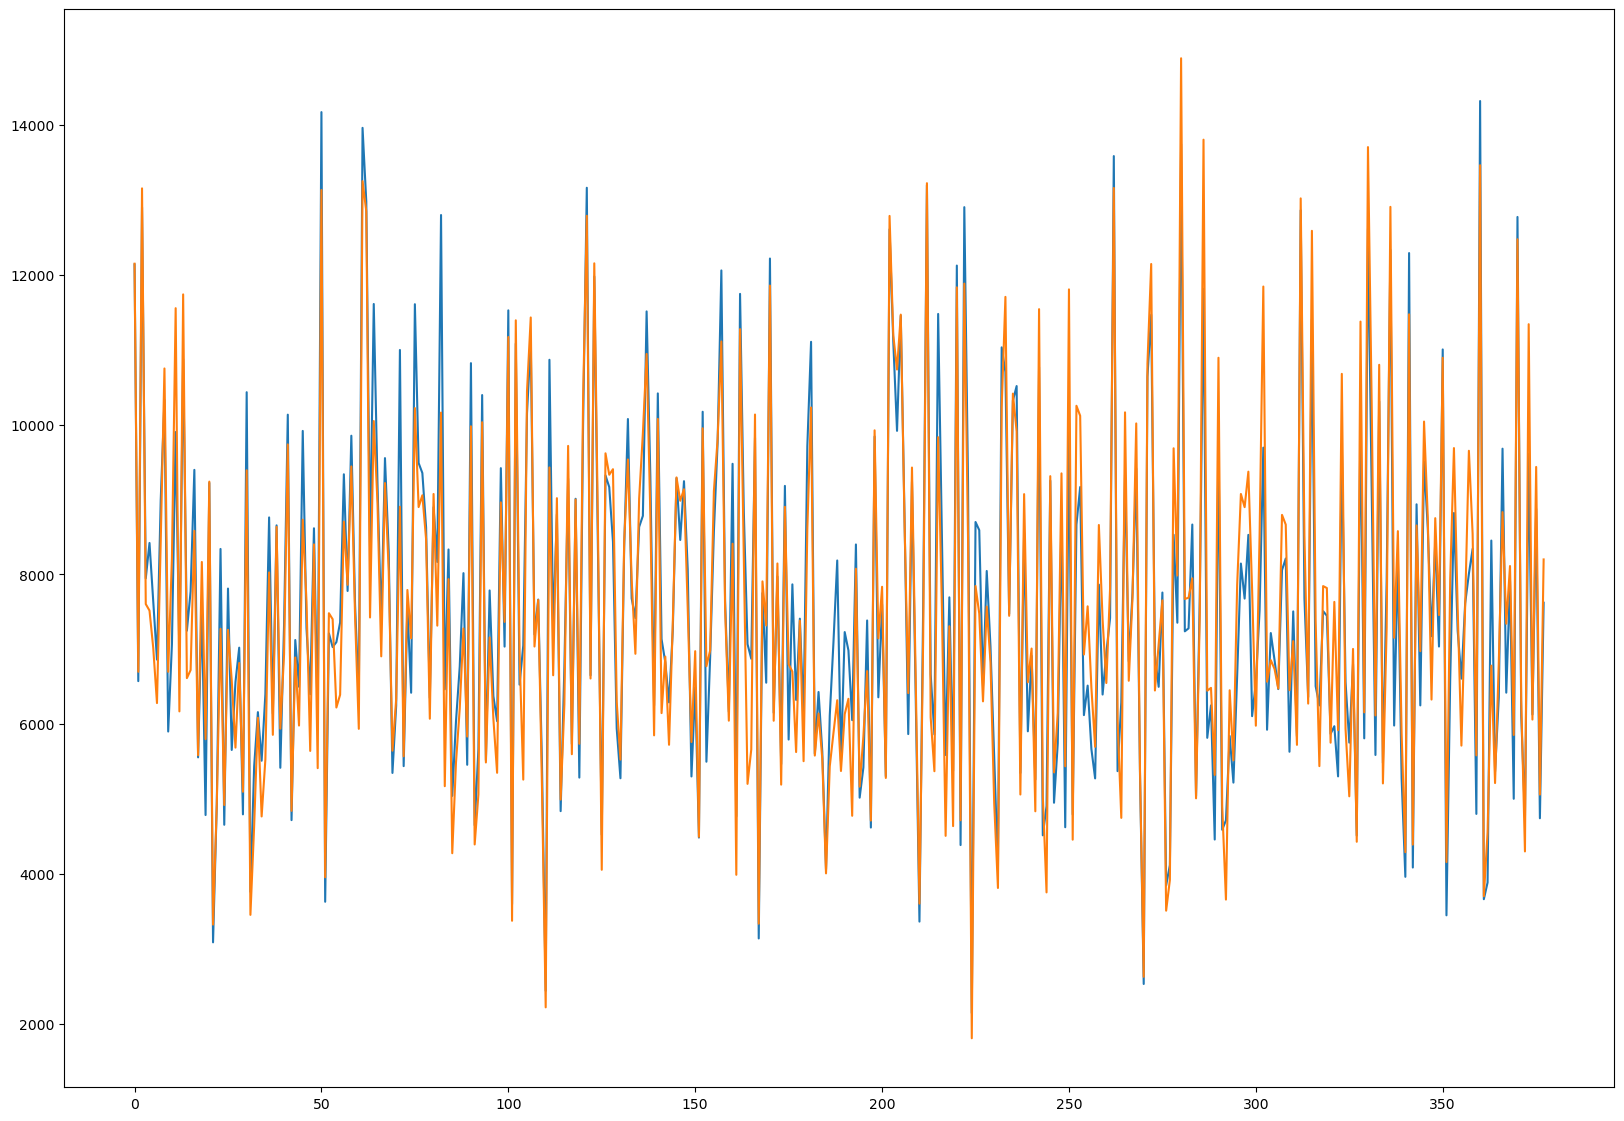

In [27]:
plt.figure(figsize=(20,14))
plt.plot(valueshat)
plt.plot(truevalues)

##### 